<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/The_Autocorrelation_of_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Autocorrelation of Variance
## Introduction


## Import the Standard Libary
I put everything I use "most of the time" into a python file called `my_library.py` which you must import into the workspace of this notebook to make the analysis execute. The file is available here: [`my_library.py`](https://github.com/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/my_library.py).

In [1]:
from my_library import *

13:29:50 Starting...
13:29:50 Installing yfinance into Google notebook...
13:30:00 Installing arch into Google notebook...
13:30:16 Initialized.


## Read the Data from _Yahoo! Finance_
I'm going to use _Yahoo! Finance_ as a data source as it is publicly available and easy to access via the `yfinance` package. You could substitute other vendors, if you have access to them.

In [2]:
df,name=download(ticker:='^GSPC',begin:='1928-01-27',end:=today('%Y-%m-%d')).dropna(),'S&P 500 Index'
df['Daily Return']=df['Adj Close'].pct_change()*hundred
df['Intraday Return']=df['Close']/df['Open']*hundred-hundred
df['Overnight Return']=(hundred+df["Daily Return"])/(hundred+df["Intraday Return"])*hundred-hundred
df.index=pd.DatetimeIndex(df.index).to_period('B')
df.dropna(inplace=True)
df.loc[df["Volume"]==0,"Volume"]=np.nan # fix early zero volumes
df.loc[:df.index[pd.Series(np.where(df['Open']==df['Close'],np.nan,one)).first_valid_index()-1],"Intraday Return"]=np.nan # fix early data without intraday pricing
nprint("\nDownloaded data for %s." % name)
display(df)

[*********************100%%**********************]  1 of 1 completed

13:30:18 
Downloaded data for S&P 500 Index.


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Intraday Return,Overnight Return
Date,,,,,,,,,
1928-01-30,17.490000,17.490000,17.490000,17.490000,17.490000,NaN,-1.130587,NaN,-1.130587
1928-01-31,17.570000,17.570000,17.570000,17.570000,17.570000,NaN,0.457404,NaN,0.457404
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,NaN,-0.227655,NaN,-0.227655
1928-02-02,17.629999,17.629999,17.629999,17.629999,17.629999,NaN,0.570442,NaN,0.570442
1928-02-03,17.400000,17.400000,17.400000,17.400000,17.400000,NaN,-1.304592,NaN,-1.304592
...,...,...,...,...,...,...,...,...,...
2024-06-26,5460.709961,5483.140137,5451.870117,5477.899902,5477.899902,3.563920e+09,0.157243,0.314793,-0.157056
2024-06-27,5473.589844,5490.810059,5467.540039,5482.870117,5482.870117,3.589530e+09,0.090732,0.169546,-0.078681
2024-06-28,5488.479980,5523.640137,5451.120117,5460.479980,5460.479980,7.199220e+09,-0.408365,-0.510159,0.102316


## Computing the Autocorrelation Function of Squared Returns





13:30:20 Computing ACF of squared returns...
13:30:20                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1404.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.50e-147
Time:                        13:30:20   Log-Likelihood:                 115.71
No. Observations:                 504   AIC:                            -227.4
Df Residuals:                     502   BIC:                            -219.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

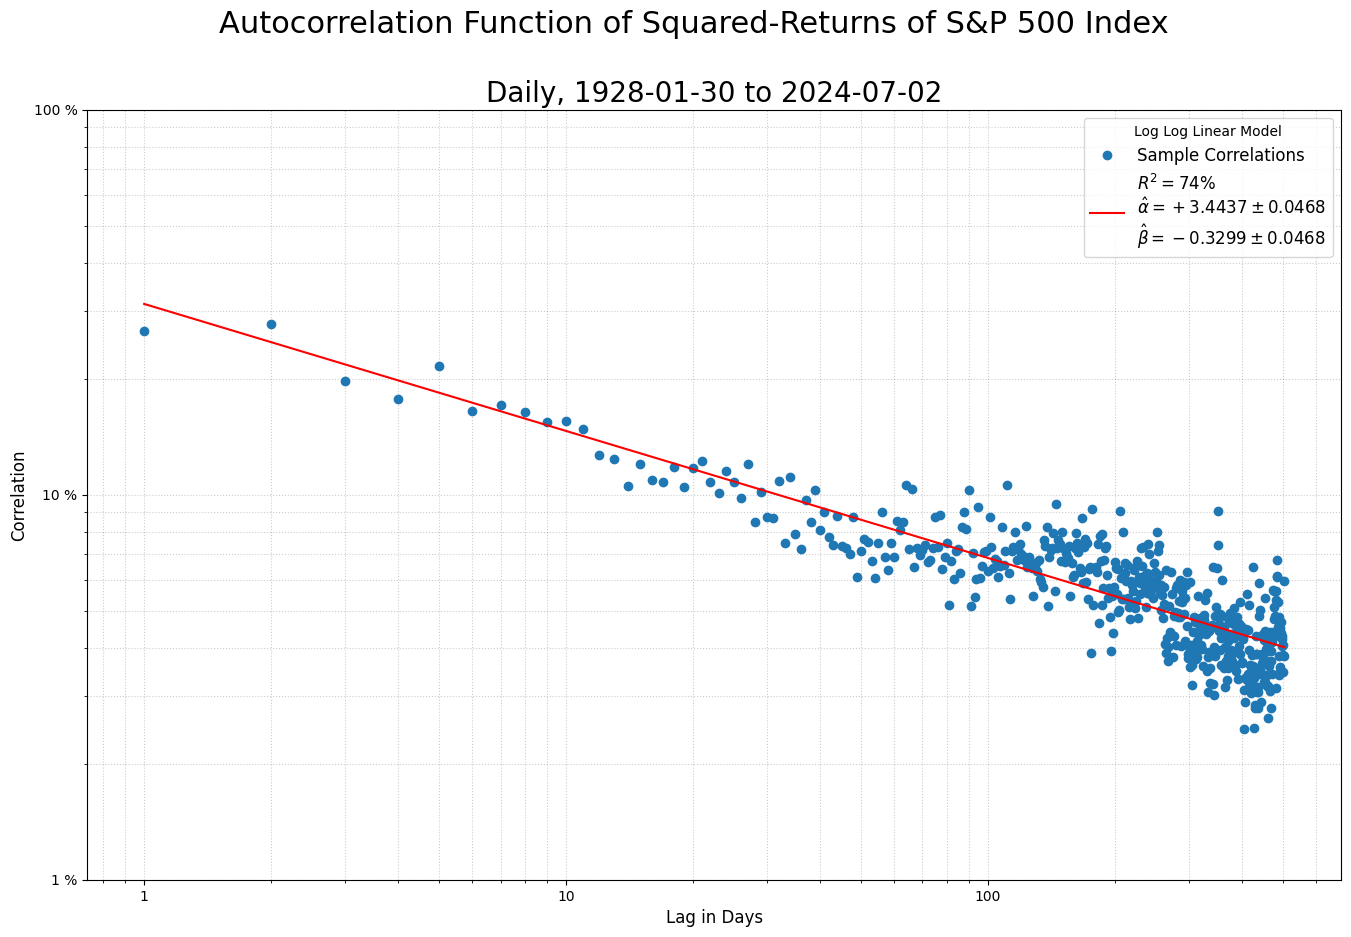

In [3]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

nprint("Computing ACF of squared returns...")
df['r2']=df['Daily Return']**2
df['ar']=df['Daily Return'].abs()
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=np.linspace(1,nlag:=int(annualize*two),nlag),y:=acf(df['r2'],nlags=nlag)[1:]*hundred,'o',label='Sample Correlations')
model=OLS(np.log(y),add_constant(np.log(x))).fit()
nprint(model.summary())
plot.plot(x,np.exp(model.predict()),'-r',label='$R^2 = %.0f \\%%$\n$\\hat{\\alpha} = %+6.4f \\pm %.4f$\n$\\hat{\\beta}= %+6.4f \\pm %.4f$' % \
  (model.rsquared*hundred,model.params[0],model.bse[0],model.params[1],model.bse[0]))
plot.set_xscale('log')
plot.set_yscale('log')
plot.grid('both','both',alpha=0.2,linestyle=':',color='black')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.set_ylim(one,hundred)
plot.set_xlabel("Lag in Days",fontsize=12)
plot.set_ylabel("Correlation",fontsize=12)
figure.suptitle(title:="Autocorrelation Function of Squared-Returns of S&P 500 Index",fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.legend(fontsize=12,title='Log Log Linear Model')
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

### Computing the Conditional Autocorrelation Functions

To investigate the asymmetric nature of variance response to stimulus we need a more refined autocorrelation function. Once that takes account of the direction of the prior return. At the simplest level, let's just condition on the sign of the prior return:

$$\begin{align}
\gamma_k^{\!+}&=\mathbb{E}\!\left[r_t^2r_{t-k}^2\left|\,r_{t-k}>0\right.\right]-\mathbb{E}\!\left[r_t^2\left|\,r_{t-k}>0\right.\right]\mathbb{E}\!\left[r_{t-k}^2\left|\,r_{t-k}>0\right.\right]\\
\mathrm{and}\;
\gamma_k^{\!-}&=\mathbb{E}\!\left[r_t^2r_{t-k}^2\left|\,r_{t-k}<0\right.\right]-\mathbb{E}\!\left[r_t^2\left|\,r_{t-k}<0\right.\right]\mathbb{E}\!\left[r_{t-k}^2\left|\,r_{t-k}<0\right.\right]
\end{align}
$$

16:59:12 Computing Directional Autocorrelation Function


Lagged                      Negatives                      Positives  \
    Correlation     Error   Sample Correlation     Error   Sample Correlation   
Lag                                                                             
1     26.570751  0.642590  24220.0   32.987895  0.943956  11225.0   18.200563   
2     27.814540  0.642603  24219.0   30.055784  0.943956  11225.0   25.667096   
3     19.724032  0.642616  24218.0   19.817906  0.943999  11224.0   20.014814   
4     17.770810  0.642630  24217.0   23.733710  0.943999  11224.0   12.599542   
5     21.632914  0.642643  24216.0   23.561457  0.943999  11224.0   19.554881   
..          ...       ...      ...         ...       ...      ...         ...   
500    4.036112  0.649314  23721.0    4.125834  0.954258  10984.0    3.897719   
501    4.285220  0.649328  23720.0    2.628073  0.954258  10984.0    6.578734   
502    3.652693  0.649342  23719.0    3.984408  0.954258  10984.0    3.397078   
503    6.266241  0.649355  23718.0    7.713444  0.954258  10984.0    4.823125   
504    4.011472  0.649369  23717.0    3.403938  0.954302  10983.0    4.931202   

                        
        Error   Sample  
Lag                     
1    0.888068  12682.0  
2    0.888103  12681.0  
3    0.888103  12681.0  
4    0.888138  12680.0  
5    0.888173  12679.0  
..        ...      ...  
500  0.897243  12424.0  
501  0.897279  12423.0  
502  0.897315  12422.0  
503  0.897351  12421.0  
504  0.897351  12421.0  

[504 rows x 9 columns]

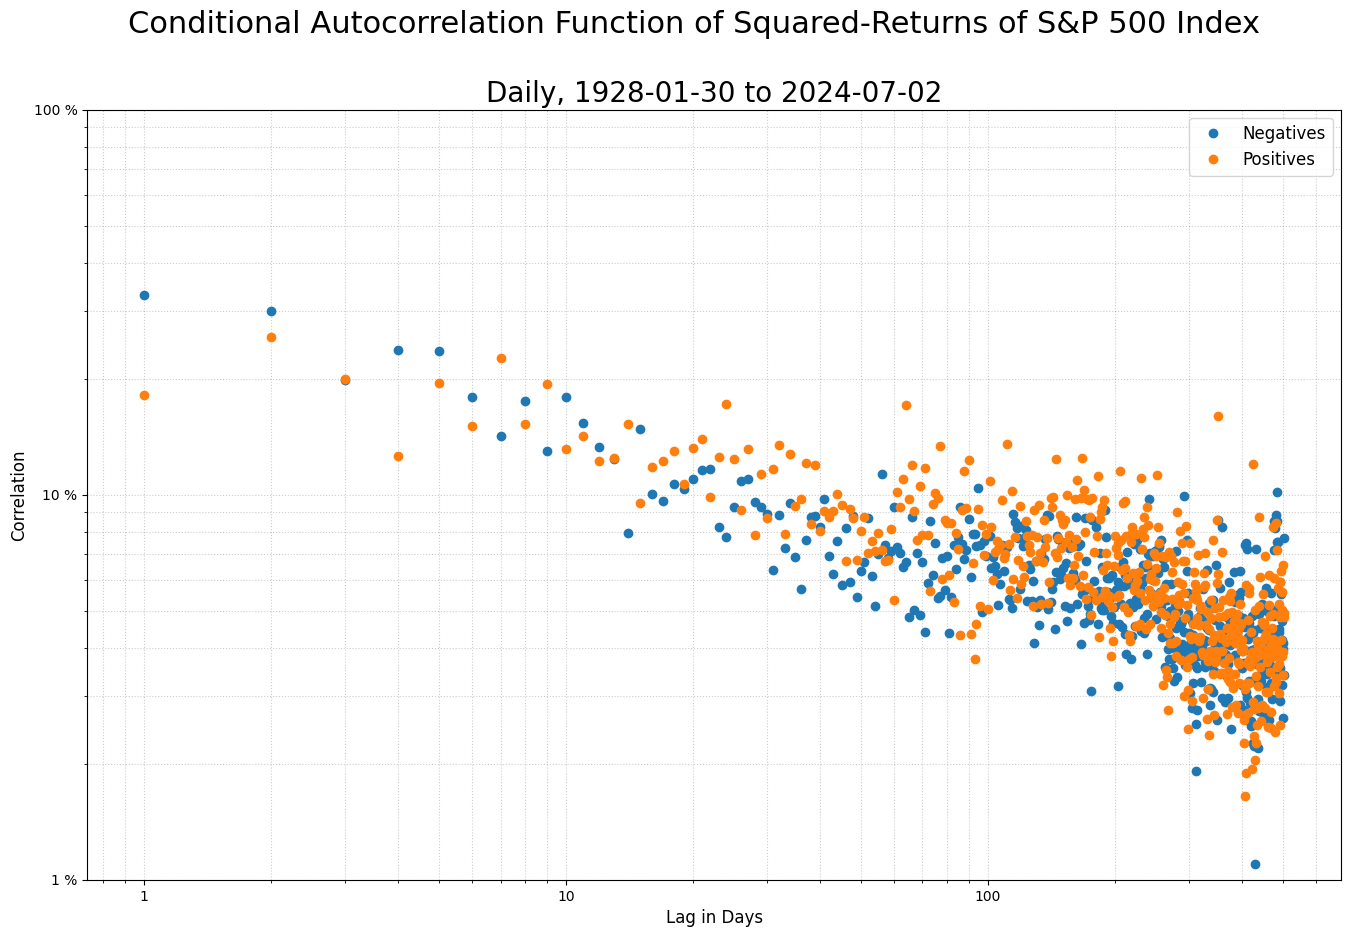

In [29]:
nprint("Computing Directional Autocorrelation Function")
df["nr2"]=df["Daily Return"].apply(lambda x:x**2 if x<zero else np.nan)
df["pr2"]=df["Daily Return"].apply(lambda x:x**2 if x>zero else np.nan)
results=pd.DataFrame({"Lag":list(map(int,x))}).set_index("Lag")

for lag in results.index:
    sample=df[["Daily Return","r2","nr2","pr2"]].copy()
    sample["Lagged"]=sample["r2"].shift(lag)
    sample["Negatives"]=sample["nr2"].shift(lag)
    sample["Positives"]=sample["pr2"].shift(lag)

    for prior in "Lagged","Negatives","Positives":
        results.loc[lag,prior+" Correlation"]=sample[["r2",prior]].corr().iloc[0,1]*hundred
        results.loc[lag,prior+" Sample"]=sample[["r2",prior]].dropna().shape[0]

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x.split(" "),results.columns)))

for column in set(results.columns.get_level_values(0)):
    results[(column,"Error")]=np.tanh(one/np.sqrt(results[(column,"Sample")]-three))*hundred

results=results[sorted(results)]
display(results)
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))

for column in "Negatives","Positives":
    plot.plot(results.index,results[(column,"Correlation")],'o',label=column)

plot.set_xscale('log')
plot.set_yscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.set_ylim(one,hundred)
plot.set_xlabel("Lag in Days",fontsize=12)
plot.set_ylabel("Correlation",fontsize=12)
figure.suptitle(title:="Conditional Autocorrelation Function of Squared-Returns of S&P 500 Index",fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.legend(fontsize=12)
plot.grid(axis='both',which='both',linestyle=':',color='black',alpha=0.2)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')


### The relationship between conditional autocorrelations at the first lag:

$$
\rho_1^{-}>\rho_1^{+}>0
$$

## Making this Analysis Quantitative

### An approximately standard Normal error statistic:

$$
Z_k=\frac{\rho_k^{-}-\rho_k^{+}}{\sqrt{N_k^{-}+N_k^{+}-6}}\approx\mathop{\mathrm{Normal}}(0,1)
$$

Lagged                      Negatives                      Positives  \
    Correlation     Error   Sample Correlation     Error   Sample Correlation   
Lag                                                                             
1     26.570751  0.642590  24220.0   32.987895  0.943956  11225.0   18.200563   
2     27.814540  0.642603  24219.0   30.055784  0.943956  11225.0   25.667096   
3     19.724032  0.642616  24218.0   19.817906  0.943999  11224.0   20.014814   
4     17.770810  0.642630  24217.0   23.733710  0.943999  11224.0   12.599542   
5     21.632914  0.642643  24216.0   23.561457  0.943999  11224.0   19.554881   
..          ...       ...      ...         ...       ...      ...         ...   
500    4.036112  0.649314  23721.0    4.125834  0.954258  10984.0    3.897719   
501    4.285220  0.649328  23720.0    2.628073  0.954258  10984.0    6.578734   
502    3.652693  0.649342  23719.0    3.984408  0.954258  10984.0    3.397078   
503    6.266241  0.649355  23718.0    7.713444  0.954258  10984.0    4.823125   
504    4.011472  0.649369  23717.0    3.403938  0.954302  10983.0    4.931202   

                           Spread                             
        Error   Sample    Z Score       p Value Significance  
Lag                                                           
1    0.888068  12682.0  11.409632  3.743106e-30          ***  
2    0.888103  12681.0   3.386168  7.087599e-04          ***  
3    0.888103  12681.0  -0.151924  8.792469e-01               
4    0.888138  12680.0   8.590397  8.666969e-18          ***  
5    0.888173  12679.0   3.091155  1.993793e-03           **  
..        ...      ...        ...           ...          ...  
500  0.897243  12424.0   0.174156  8.617426e-01               
501  0.897279  12423.0  -3.016107  2.560425e-03           **  
502  0.897315  12422.0   0.448385  6.538756e-01               
503  0.897351  12421.0   2.206512  2.734816e-02            *  
504  0.897351  12421.0  -1.165907  2.436519e-01               

[504 rows x 12 columns]

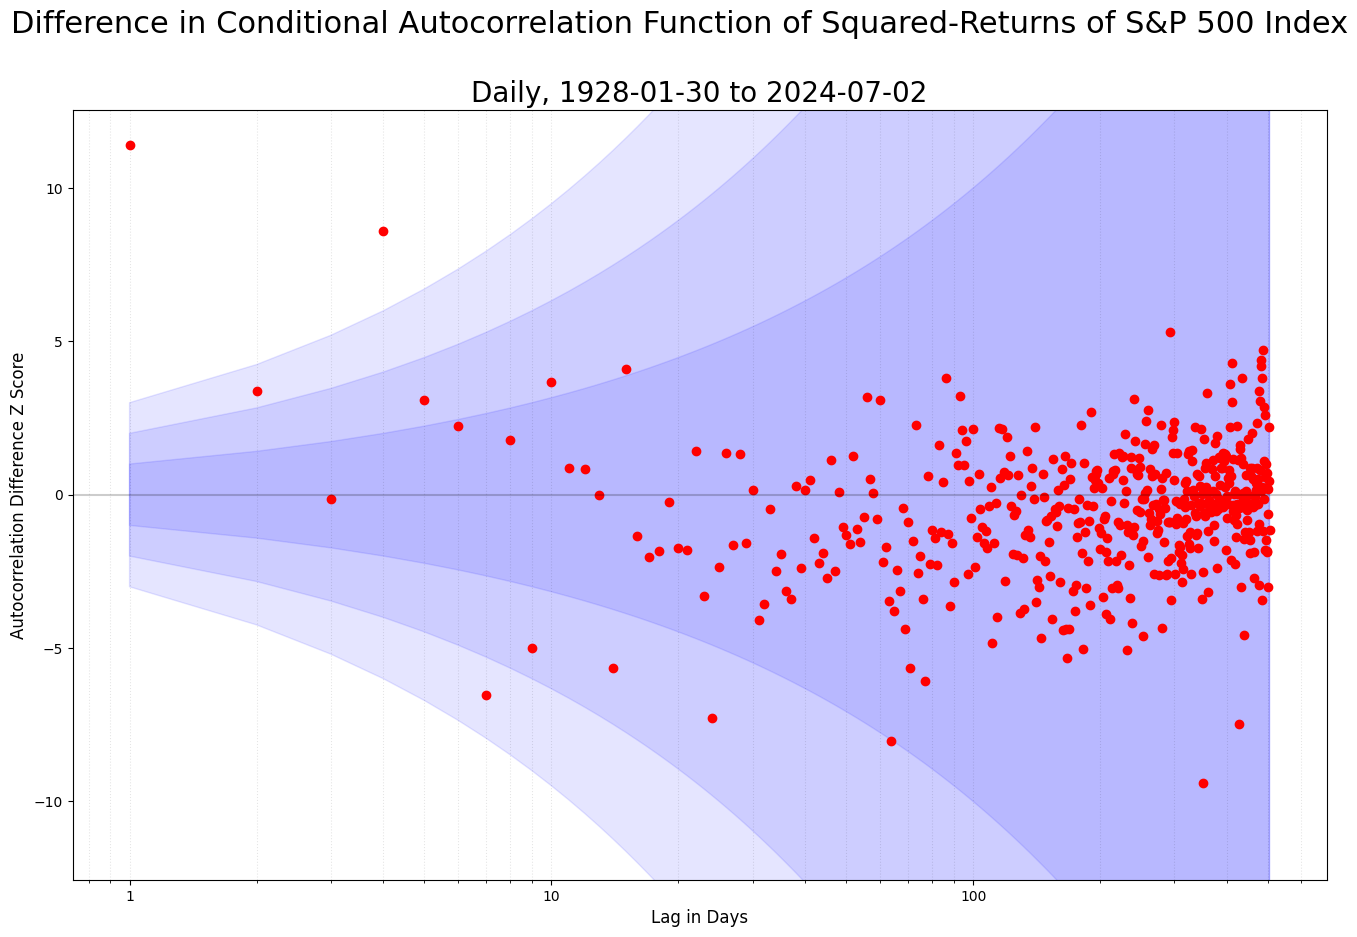

In [38]:
from scipy.stats import norm
results[('Spread','Z Score')]=(results[('Negatives','Correlation')]-results[('Positives','Correlation')])/np.sqrt(results[('Negatives','Error')]**2+results[('Positives','Error')]**2)
results[('Spread','p Value')]=results[('Spread','Z Score')].apply(lambda x:min([norm.cdf(x),norm.sf(x)])*two)
results[('Spread','Significance')]=results[('Spread','p Value')].apply(lambda x:'***' if x<0.001 else '**' if x<0.01 else '*' if x<0.05 else '')
display(results)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results.index,y:=results[('Spread','Z Score')],'o',color='red')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel("Lag in Days",fontsize=12)
plot.set_ylabel("Autocorrelation Difference Z Score",fontsize=12)
figure.suptitle(title:="Difference in Conditional Autocorrelation Function of Squared-Returns of S&P 500 Index",fontsize=22)

for cv in one,two,three:
    plot.fill_between(x,e:=np.full(len(x),cv)*np.sqrt(x),-e,alpha=0.1,color='blue')

plot.set_ylim(l:=1.1*min([min(y),-max(y)]),-l)
plot.grid(axis='x',which='both',linestyle=':',color='black',alpha=0.1)
plot.set_title(subtitle,fontsize=20)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')


13:30:42 Computing PACF of squared returns...


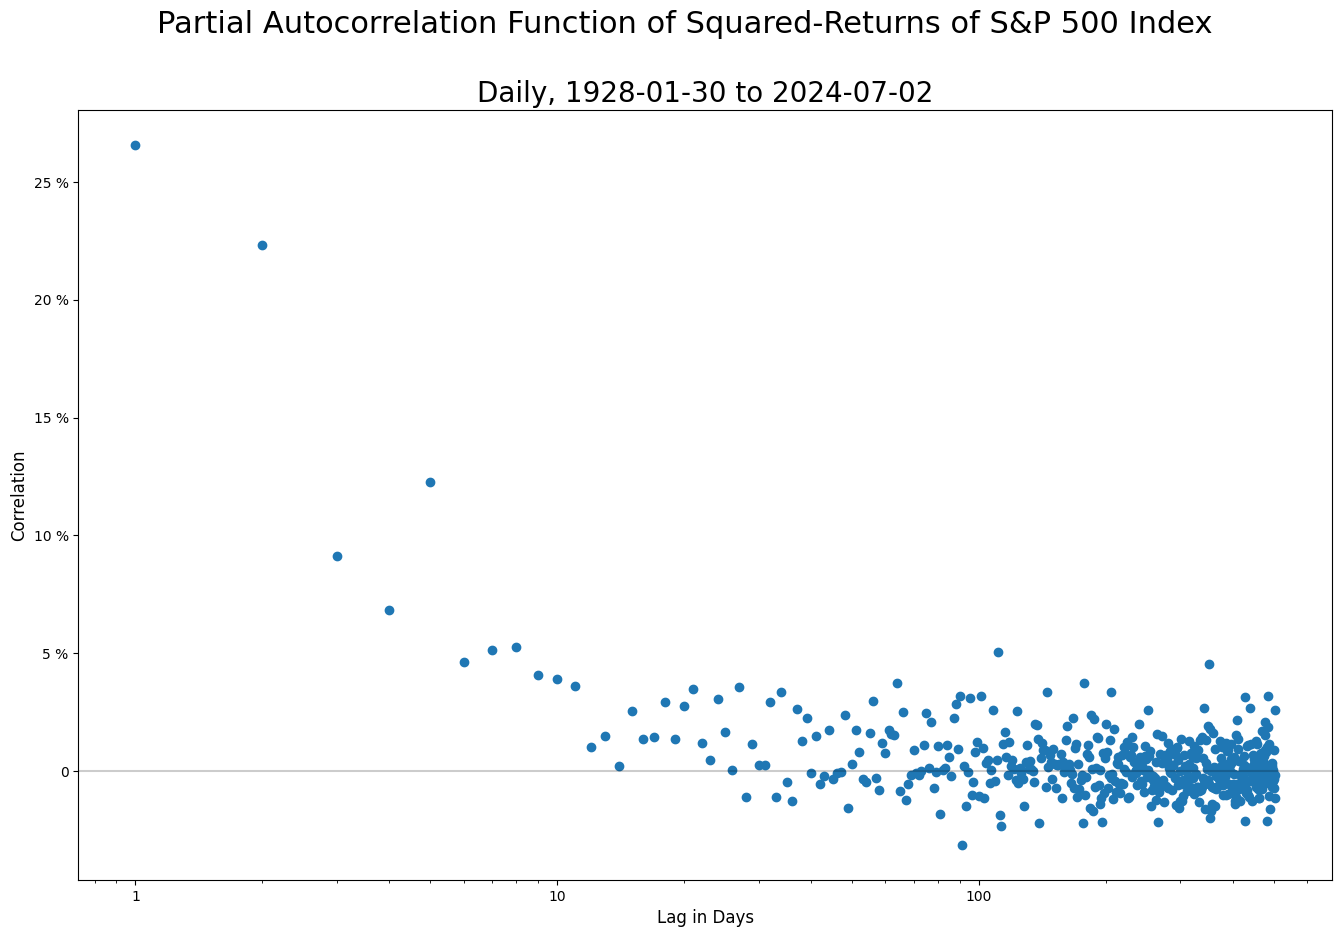

In [5]:
nprint("Computing PACF of squared returns...")
df['r2']=df['Daily Return']**2
df['ar']=df['Daily Return'].abs()
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=np.linspace(1,nlag:=int(annualize*two),nlag),y:=pacf(df['r2'],nlags=nlag)[1:]*hundred,'o')
#plot.set_xlim(,nlag+1)
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.yaxis.set_major_formatter(PercentLabels(0))
plot.set_xlabel("Lag in Days",fontsize=12)
plot.set_ylabel("Correlation",fontsize=12)
plot.axhline(color='black',alpha=0.2)
figure.suptitle(title:="Partial Autocorrelation Function of Squared-Returns of S&P 500 Index",fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
#plot.legend(fontsize=12,title='Log Linear Model')
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

In [6]:

results

Lagged                      Negatives                      Positives  \
    Correlation     Error   Sample Correlation     Error   Sample Correlation   
Lag                                                                             
1     26.570751  0.642590  24220.0   32.987895  0.943956  11225.0   18.200563   
2     27.814540  0.642603  24219.0   30.055784  0.943956  11225.0   25.667096   
3     19.724032  0.642616  24218.0   19.817906  0.943999  11224.0   20.014814   
4     17.770810  0.642630  24217.0   23.733710  0.943999  11224.0   12.599542   
5     21.632914  0.642643  24216.0   23.561457  0.943999  11224.0   19.554881   
..          ...       ...      ...         ...       ...      ...         ...   
500    4.036112  0.649314  23721.0    4.125834  0.954258  10984.0    3.897719   
501    4.285220  0.649328  23720.0    2.628073  0.954258  10984.0    6.578734   
502    3.652693  0.649342  23719.0    3.984408  0.954258  10984.0    3.397078   
503    6.266241  0.649355  23718.0    7.713444  0.954258  10984.0    4.823125   
504    4.011472  0.649369  23717.0    3.403938  0.954302  10983.0    4.931202   

                        
        Error   Sample  
Lag                     
1    0.888068  12682.0  
2    0.888103  12681.0  
3    0.888103  12681.0  
4    0.888138  12680.0  
5    0.888173  12679.0  
..        ...      ...  
500  0.897243  12424.0  
501  0.897279  12423.0  
502  0.897315  12422.0  
503  0.897351  12421.0  
504  0.897351  12421.0  

[504 rows x 9 columns]